# Liver-Cirrhosis-Stage-Prediction

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.simplefilter(action='ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cirrhosis-prediction-dataset/cirrhosis.csv
/kaggle/input/no-title/train_dataset.csv
/kaggle/input/no-title/test_dataset.csv


Loading dataset:

In [2]:
import pandas as pd
df_full = pd.read_csv("../input/no-title/train_dataset.csv")
df_full


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,4622,1762,C,Placebo,20909,M,NaN,N,NaN,N,0.9,360.0,2.43,NaN,3444.4,131.59,130.0,314.0,12.9,1.0
6796,4446,2955,C,Placebo,28650,F,Y,N,N,N,0.3,NaN,2.99,43.0,NaN,NaN,238.0,399.0,10.6,4.0
6797,4082,584,C,NaN,24102,F,N,Y,NaN,N,0.3,218.0,2.79,NaN,NaN,26.35,123.0,103.0,9.3,1.0
6798,2248,1426,CL,D-penicillamine,19791,F,N,NaN,Y,N,0.3,NaN,1.96,12.0,289.0,72.95,134.0,354.0,10.6,2.0


Separating a small slice of data as validation set.\
This is meant for tackling **data leakage** due to train-test contamination.\
Treating `df_val` as a pseudo "Real World" data and see how model performs.

In [3]:
df = df_full.copy()
df_val = pd.read_csv("../input/cirrhosis-prediction-dataset/cirrhosis.csv")   
#df_val.reset_index(inplace = True)
#df_val = df_full.iloc[6500:,:].copy()
print("Shape of new dataframes - {} , {}".format(df.shape, df_val.shape))
df

Shape of new dataframes - (6800, 20) , (418, 20)


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,4622,1762,C,Placebo,20909,M,NaN,N,NaN,N,0.9,360.0,2.43,NaN,3444.4,131.59,130.0,314.0,12.9,1.0
6796,4446,2955,C,Placebo,28650,F,Y,N,N,N,0.3,NaN,2.99,43.0,NaN,NaN,238.0,399.0,10.6,4.0
6797,4082,584,C,NaN,24102,F,N,Y,NaN,N,0.3,218.0,2.79,NaN,NaN,26.35,123.0,103.0,9.3,1.0
6798,2248,1426,CL,D-penicillamine,19791,F,N,NaN,Y,N,0.3,NaN,1.96,12.0,289.0,72.95,134.0,354.0,10.6,2.0


Checking number of missing values per column:

In [4]:
col_list = df.columns
ukw_cols = []
for i in col_list:
    if df[i].value_counts().sum() != len(df):
        ukw_val = len(df) - df[i].value_counts().sum()
        ukw_cols.append((i,ukw_val))
df2 = pd.DataFrame(ukw_cols, columns=['Feature','No. of missing values'])
df2

,Feature,No. of missing values
0,Drug,2025
1,Ascites,2246
2,Hepatomegaly,2427
3,Spiders,2590
4,Cholesterol,3101
5,Copper,2156
6,Alk_Phos,2498
7,SGOT,2102
8,Tryglicerides,2812
9,Platelets,338


In [5]:
s = df_val.isnull().sum().sum()
missing_percent = (s*100)/(len(df)*(len(df.columns)-4))     #Dropping ID, N_Days, Status and Stage from total data consideration
print("Percentage of missing data in the whole dataset: {}%.".format(missing_percent.round(2)))

Percentage of missing data in the whole dataset: 0.95%.


Since there are so many missing values, filtering the dataset by dropping samples/rows with more than 2 missing values.

In [6]:
#df.dropna(axis= 0, inplace= True, thresh = 18)
df_val

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [7]:
df_val['Stage'].value_counts()

3.0    155
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64

# ENCODING OPERATION 
Encoding categorical columns using Ordinal Encoding in the following way:
* Spiders:       Y = 1 and N = 0
* Hepatomegaly:  Y = 1 and N = 0
* Ascites:       Y = 1 and N = 0
* Drug:          D-penicillamine = 0 and Placebo = 1  (reason for this particular encoding is explained later)
* Edema:         N = -1, S = 0, Y = 1
* Status:        D = -1, CL = 0, C = 1

For Sex, One Hot Encoding is performed.

In [8]:
def EncodeAll(df):
    from sklearn.preprocessing import OrdinalEncoder

    df["NaN_Drug"] = df["Drug"].isna()
    df_copy = df.copy()
    ordinal_encoder = OrdinalEncoder()
    col_dict = {"Y": 1, "N": 0}
    df_copy["Spiders"].replace(col_dict, inplace=True)
    df_copy["Hepatomegaly"].replace(col_dict, inplace=True)
    df_copy["Ascites"].replace(col_dict, inplace=True)
    df_copy["Drug"].replace({"D-penicillamine": 0, "Placebo": 1}, inplace = True)
    df_copy["Edema"].replace({"N": -1, "S": 0, "Y": 1}, inplace = True)
    df_copy["Status"].replace({"D": -1, "CL": 0, "C": 1}, inplace = True)


    from sklearn.preprocessing import OneHotEncoder


    OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    df_OHE = pd.DataFrame(OH_encoder.fit_transform(df_copy[["Sex"]]))
    df_OHE.index = df_copy.index

    df_encoded = df_copy.drop(["Sex"], axis=1)
    encoded_cols = list(OH_encoder.get_feature_names(["Sex"]))
    df_encoded[encoded_cols] = OH_encoder.transform(df_copy[["Sex"]])

    return df_encoded

df_encoded = EncodeAll(df)
df_encoded_val = EncodeAll(df_val)


Due to the presence of ambiguity (missing values) of which drug was administered to patients, a separate column has been created which keeps track of this ambiguity in form of boolean data.\
This column represents which all samples/patients previously had `NaN` in Drug column.

# IMPUTATION OPERATION
Number of missing values per feature:


In [9]:
df.isna().sum()

ID                  0
N_Days              0
Status              0
Drug             2025
Age                 0
Sex                 0
Ascites          2246
Hepatomegaly     2427
Spiders          2590
Edema               0
Bilirubin           0
Cholesterol      3101
Albumin             0
Copper           2156
Alk_Phos         2498
SGOT             2102
Tryglicerides    2812
Platelets         338
Prothrombin       155
Stage               0
NaN_Drug            0
dtype: int64

In [10]:
df_val.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
NaN_Drug           0
dtype: int64

Using KNNImputer for imputing the missing values in the features. \
It is a more useful method which works on the basic approach of the KNN algorithm rather than the naive approach of filling all the values with mean or the median.

In [11]:
#Imputation
import numpy as np
from sklearn.impute import KNNImputer
import pandas as pd

def ImputeAll(df_encoded):
    imputer = KNNImputer(n_neighbors =5)                              #Mess around with n_neighbors to improve accuracy in the end model
    imputed_data = imputer.fit_transform(df_encoded) 
    df_imputed = pd.DataFrame(imputed_data)
    df_imputed.columns = df_encoded.columns
    del imputer

    return df_imputed

df_imputed = ImputeAll(df_encoded)
df_imputed_val = ImputeAll(df_encoded_val)

In [12]:
df_imputed.isna().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
NaN_Drug         0
Sex_F            0
Sex_M            0
dtype: int64

In [13]:
df_imputed_val.isna().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
NaN_Drug         0
Sex_F            0
Sex_M            0
dtype: int64

All missing values have been accounted for.

In [14]:
df_imputed.describe()

,ID,N_Days,Status,Drug,Age,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,NaN_Drug,Sex_F,Sex_M
count,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,...,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000
mean,6268.608088,1664.055441,0.150588,0.489676,22863.223529,0.126706,0.420235,0.309735,-0.716912,1.806147,...,68.795735,1797.753232,79.399043,134.079618,293.367824,11.231056,3.157206,0.297794,0.858088,0.141912
std,2405.527133,1332.308135,0.947807,0.436528,4671.135682,0.286283,0.417308,0.385804,0.579349,3.218009,...,51.596268,1350.931405,37.628954,38.870722,112.937967,1.113798,0.993059,0.457322,0.348985,0.348985
min,1239.000000,41.000000,-1.000000,0.000000,9598.000000,0.000000,0.000000,0.000000,-1.000000,0.300000,...,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000,0.000000,0.000000,0.000000
25%,4353.750000,537.000000,-1.000000,0.000000,19416.500000,0.000000,0.000000,0.000000,-1.000000,0.300000,...,39.000000,1239.455000,48.067500,117.000000,216.000000,10.500000,2.000000,0.000000,1.000000,0.000000
50%,6599.500000,1443.000000,1.000000,0.400000,23367.000000,0.000000,0.400000,0.200000,-1.000000,0.400000,...,67.000000,1581.450000,80.766000,129.400000,286.000000,11.100000,4.000000,0.000000,1.000000,0.000000
75%,8299.250000,2519.000000,1.000000,1.000000,27125.500000,0.000000,1.000000,0.600000,-1.000000,1.800000,...,88.600000,2008.310000,106.112500,144.000000,363.000000,11.700000,4.000000,1.000000,1.000000,0.000000
max,9999.000000,4795.000000,1.000000,1.000000,28650.000000,1.000000,1.000000,1.000000,1.000000,28.000000,...,588.000000,13862.400000,340.480000,498.000000,563.000000,18.000000,4.000000,1.000000,1.000000,1.000000


In [15]:
df_imputed_val.describe()

,ID,N_Days,Status,Drug,Age,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,NaN_Drug,Sex_F,Sex_M
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,209.500000,1917.782297,0.169856,0.489952,18533.351675,0.075120,0.535407,0.295694,-0.799043,3.220813,...,99.300957,1969.008708,123.565407,126.567464,257.155981,10.731914,3.025359,0.253589,0.894737,0.105263
std,120.810458,1104.672992,0.955785,0.445327,3815.845055,0.239109,0.456385,0.409047,0.506835,4.407506,...,78.205649,1894.333743,51.419009,57.180801,97.171137,1.019985,0.877006,0.435586,0.307260,0.307260
min,1.000000,41.000000,-1.000000,0.000000,9598.000000,0.000000,0.000000,0.000000,-1.000000,0.300000,...,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000,0.000000,0.000000,0.000000
25%,105.250000,1092.750000,-1.000000,0.000000,15644.500000,0.000000,0.000000,0.000000,-1.000000,0.800000,...,46.200000,987.500000,86.809000,91.000000,190.000000,10.000000,2.000000,0.000000,1.000000,0.000000
50%,209.500000,1730.000000,1.000000,0.400000,18628.000000,0.000000,0.600000,0.000000,-1.000000,1.400000,...,76.000000,1424.800000,119.350000,116.400000,251.500000,10.600000,3.000000,0.000000,1.000000,0.000000
75%,313.750000,2613.500000,1.000000,1.000000,21272.500000,0.000000,1.000000,0.600000,-1.000000,3.400000,...,130.750000,2163.200000,150.272500,146.450000,315.500000,11.100000,4.000000,1.000000,1.000000,0.000000
max,418.000000,4795.000000,1.000000,1.000000,28650.000000,1.000000,1.000000,1.000000,1.000000,28.000000,...,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000,1.000000,1.000000,1.000000


# FEATURE EXPLORATION
Exploring and analysing features using visualization and statistics against target to draw insights about correlations.

<Figure size 720x360 with 0 Axes>

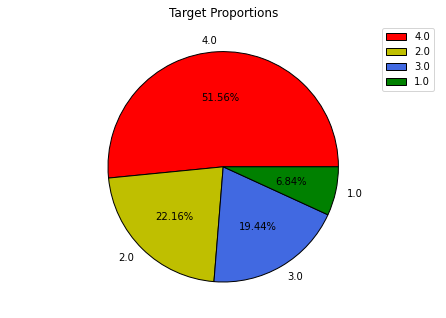

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

a = df_imputed["Stage"].value_counts()
from matplotlib import pyplot as plt
a = dict(a)
stages = list(a.keys())
counts = list(a.values())
colors = ['r', 'y', 'royalblue', 'g']
fig = plt.figure(figsize = (10, 5))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(counts, labels = stages,autopct='%1.2f%%', colors= colors, wedgeprops = {"edgecolor" : "black",'linewidth': 1,'antialiased': True})
plt.legend()
plt.title("Target Proportions")
plt.show()

**Target Class** \
People with early-stage cirrhosis of the liver usually don't have symptoms. \
Natually, those people would not get themselves checked up and by the time they show symptoms and get tested, their liver cirrhosis would have progressed to a higher stage and therefore the target class seems to be imbalanced. 

Text(0.5, 0.98, 'Bilirubin x Alkaline Phosphatase')

<Figure size 1440x720 with 0 Axes>

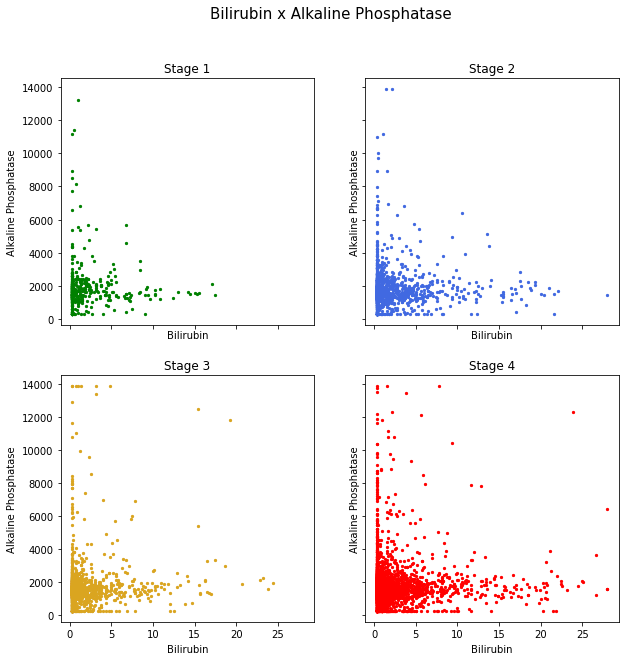

In [17]:
df_1 = df_imputed[df_imputed['Stage']==1]
df_2 = df_imputed[df_imputed['Stage']==2]
df_3 = df_imputed[df_imputed['Stage']==3]
df_4 = df_imputed[df_imputed['Stage']==4]

plt.figure(figsize=(20,10))
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True, figsize = (10, 10))
axes[0][0].scatter(df_1["Bilirubin"],df_1["Alk_Phos"], s = 5, color = 'g')
axes[0][0].set_xlabel('Bilirubin', labelpad = 5)
axes[0][0].set_ylabel('Alkaline Phosphatase', labelpad = 5)
axes[0][0].set_title('Stage 1')


axes[0][1].scatter(df_2["Bilirubin"],df_2["Alk_Phos"], s= 5, color = 'royalblue')
axes[0][1].set_xlabel('Bilirubin', labelpad = 5)
axes[0][1].set_ylabel('Alkaline Phosphatase', labelpad = 5)
axes[0][1].set_title('Stage 2')

axes[1][0].scatter(df_3["Bilirubin"],df_3["Alk_Phos"], s= 5, color = 'goldenrod')
axes[1][0].set_xlabel('Bilirubin', labelpad = 5)
axes[1][0].set_ylabel('Alkaline Phosphatase', labelpad = 5)
axes[1][0].set_title('Stage 3')

axes[1][1].scatter(df_4["Bilirubin"],df_4["Alk_Phos"], s= 5, color = 'r')
axes[1][1].set_xlabel('Bilirubin', labelpad = 5)
axes[1][1].set_ylabel('Alkaline Phosphatase', labelpad = 5)
axes[1][1].set_title('Stage 4')

f.suptitle("Bilirubin x Alkaline Phosphatase", fontsize=15)

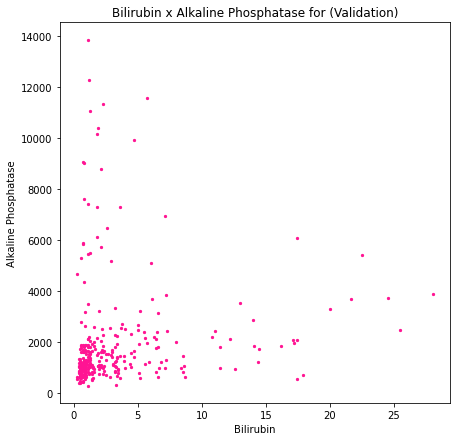

In [18]:
plt.figure(figsize=(7,7))
plt.scatter(df_val["Bilirubin"],df_val["Alk_Phos"], s= 5, color = 'deeppink')
plt.xlabel("Bilirubin")
plt.ylabel("Alkaline Phosphatase")
plt.title("Bilirubin x Alkaline Phosphatase for (Validation)")
plt.show()

**Bilirubin**\
Bilirubin is the yellow pigment extracted from old blood cells by the liver and excreeted with the stool. Studies have shown that increase in Bilirubin in blood accounts for liver malfunction. \
The given data shows that Bilirubin value in blood is directly proportional to the cirrhosis of the liver.

**Alkaline Phosphatase**\
Alkaline Phosphatase (ALP) is produced when there is bone damage or liver damage. To find the right source, a follow-up Bilirubin test is conducted. \
If the Bilirubin value is within the normal range then the cause for ALP production would be some bone damage and if the value of Bilirubin is high, then it is concluded that the ALP is in fact produced by damaged liver.

Text(0.5, 0.98, 'Tryglicerides x Alkaline Phosphatase')

<Figure size 1440x720 with 0 Axes>

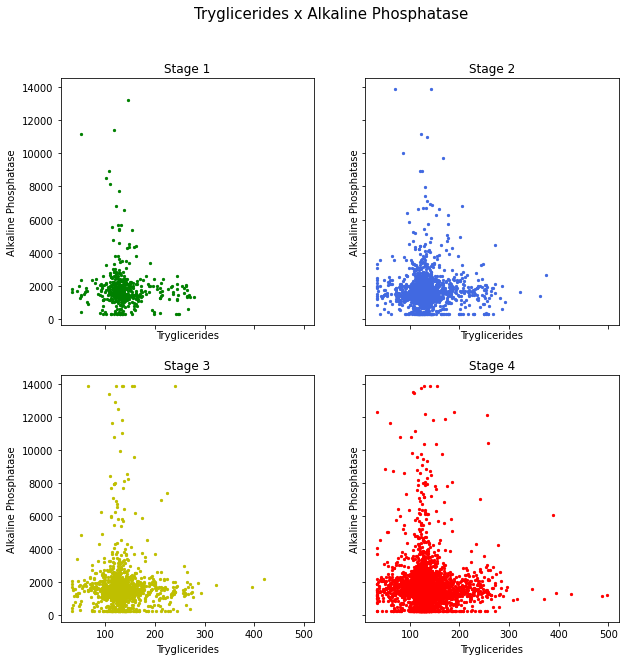

In [19]:
plt.figure(figsize=(20,10))
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True, figsize = (10, 10))
axes[0][0].scatter(df_1["Tryglicerides"],df_1["Alk_Phos"], s = 5, color = 'g')
axes[0][0].set_xlabel('Tryglicerides', labelpad = 5)
axes[0][0].set_ylabel('Alkaline Phosphatase', labelpad = 5)
axes[0][0].set_title('Stage 1')


axes[0][1].scatter(df_2["Tryglicerides"],df_2["Alk_Phos"], s= 5, color = 'royalblue')
axes[0][1].set_xlabel('Tryglicerides', labelpad = 5)
axes[0][1].set_ylabel('Alkaline Phosphatase', labelpad = 5)
axes[0][1].set_title('Stage 2')

axes[1][0].scatter(df_3["Tryglicerides"],df_3["Alk_Phos"], s= 5, color = 'y')
axes[1][0].set_xlabel('Tryglicerides', labelpad = 5)
axes[1][0].set_ylabel('Alkaline Phosphatase', labelpad = 5)
axes[1][0].set_title('Stage 3')

axes[1][1].scatter(df_4["Tryglicerides"],df_4["Alk_Phos"], s= 5, color = 'r')
axes[1][1].set_xlabel('Tryglicerides', labelpad = 5)
axes[1][1].set_ylabel('Alkaline Phosphatase', labelpad = 5)
axes[1][1].set_title('Stage 4')

f.suptitle("Tryglicerides x Alkaline Phosphatase", fontsize=15)

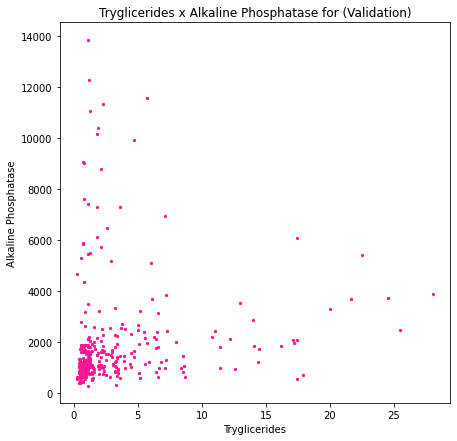

In [20]:
plt.figure(figsize=(7,7))
plt.scatter(df_val["Bilirubin"],df_val["Alk_Phos"], s= 5, color = 'deeppink')
plt.xlabel("Tryglicerides")
plt.ylabel("Alkaline Phosphatase")
plt.title("Tryglicerides x Alkaline Phosphatase for (Validation)")
plt.show()

**Triglycerides**\
Triglycerides are a type of fat (lipid) found in the blood and the liver is the central organ for fatty acid metabolism. If there is presence of high levels of Triglycerides, it indicates that the liver is not functioning properly. With the progression of liver cirrhosis, higher levels of Triglycerides are found in the blood.\
Triglycerides test can also be used to determine the source of ALP production in the body and the graphs dictate that it is produced due to cirrhosis of liver.


Text(0.5, 0.98, 'Bilirubin x SGOT')

<Figure size 1440x720 with 0 Axes>

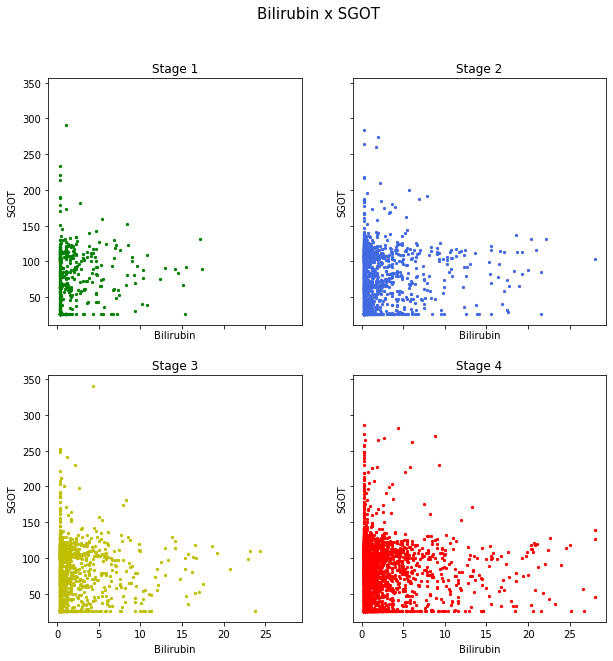

In [21]:
plt.figure(figsize=(20,10))
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True, figsize = (10, 10))
axes[0][0].scatter(df_1["Bilirubin"],df_1["SGOT"], s = 5, color = 'g')
axes[0][0].set_xlabel('Bilirubin', labelpad = 5)
axes[0][0].set_ylabel('SGOT', labelpad = 5)
axes[0][0].set_title('Stage 1')


axes[0][1].scatter(df_2["Bilirubin"],df_2["SGOT"], s = 5, color = 'royalblue')
axes[0][1].set_xlabel('Bilirubin', labelpad = 5)
axes[0][1].set_ylabel('SGOT', labelpad = 5)
axes[0][1].set_title('Stage 2')

axes[1][0].scatter(df_3["Bilirubin"],df_3["SGOT"], s = 5, color = 'y')
axes[1][0].set_xlabel('Bilirubin', labelpad = 5)
axes[1][0].set_ylabel('SGOT', labelpad = 5)
axes[1][0].set_title('Stage 3')

axes[1][1].scatter(df_4["Bilirubin"],df_4["SGOT"], s = 5, color = 'r')
axes[1][1].set_xlabel('Bilirubin', labelpad = 5)
axes[1][1].set_ylabel('SGOT', labelpad = 5)
axes[1][1].set_title('Stage 4')

f.suptitle("Bilirubin x SGOT", fontsize=15)

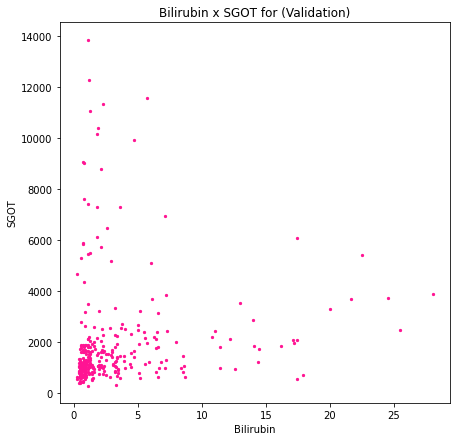

In [22]:
plt.figure(figsize=(7,7))
plt.scatter(df_val["Bilirubin"],df_val["Alk_Phos"], s= 5, color = 'deeppink')
plt.xlabel("Bilirubin")
plt.ylabel("SGOT")
plt.title("Bilirubin x SGOT for (Validation)")
plt.show()

**SGOT**  \
Serum glutamic oxaloacetic transaminase (SGOT), an enzyme that is normally present in liver and heart cells. SGOT is released into blood when the liver or heart is damaged. \
To find the right source, a follow-up Bilirubin test is conducted. If the Bilirubin value is within the normal range then the cause for SGOT production would be heart damage and if the value of Bilirubin is high, then it is concluded that the presence of high levels of SGOT is because of liver damage.\
The graphs drawn (above) support this fact.

**Prothrombin**\
Prothrombin is a protein made by the liver. It is one of several substances known as clotting (coagulation) factors. Prothrombin  time (in seconds) is the time taken for blood clotting. If the blood clots too slowy, it means the protein is being produced insufficiently by the liver, meaning the liver is malfunctioning/damaged. Average Prothrombin time in humans is 11 to 13.5 seconds. Generally, if the Prothrombin time is more than this range, it indicates severe lever damage/cirrhosis.

In [23]:
df_imputed.groupby("Stage")["Prothrombin"].mean()

Stage
1.0    11.223785
2.0    11.228865
3.0    11.209017
4.0    11.241272
Name: Prothrombin, dtype: float64

In [24]:
df_imputed_val["Prothrombin"].mean()

10.731913875598085

The Prothrombin time data is inaccurate! Because the Prothrombin time given in the data is same for every stage of liver cirrhosis which is not possible. Realistically, Prothrombin time is supposed to increase (beyond 13.5 seconds) with the progression of liver cirrhosis. But the values given in the data tend to remain in the normal range.

**Urinary Copper**\
Urine is tested for the presence of copper. The copper urine test is used to determine the presence of Wilson disease, a sometimes fatal condition in which the buildup of excess copper damages the liver, and eventually the kidneys, eyes, and brain. Urinary copper excretion was found to be increased in patients with cholestasis, hepatitis and cirrhosis, but the penicillamine-induced increment was normal.

In [25]:
df_filter = df_imputed[df_imputed["Drug"] != 1]
df_filter.groupby("Stage")["Copper"].mean()

Stage
1.0    70.016502
2.0    69.801019
3.0    67.819092
4.0    68.558062
Name: Copper, dtype: float64

In [26]:
df_filter_val = df_imputed_val[df_imputed_val["Drug"] != 1]
df_filter_val["Copper"].mean()

100.21212121212123

As per the data, patients induced with penicillamine have stable urinary copper values and patients induced with placebo have more or less stagnant values.

**Drug**\
Drug column was labelled as D - Penicillamine = 0 and Placebo = 1 because:\
High concerntrations of Urinary Copper is a good indicator of the severity of liver damage. D - Penicillamine tends to control this increment in Copper concerntration and therefore masking the actual condition of liver. Hence, using Ordinal Encoding, D - Penicillamine has been weighted as 0 (zero importance).\
Whereas, Placebo has no actual treatment properties; Placebo does not control Copper levels in urine. This untreated Urinary Copper concerntration exposes the severity of liver damage. Therefore the Placebo has been weighted as 1 using Ordinal Encoding.

**Cholesterol**\
High-density lipoprotein (HDL) cholesterol and its major apolipoproteins have been shown to be reduced in cirrhosis. The given data gently reflects this trend.

In [27]:
df_imputed.groupby("Stage")["Cholesterol"].mean()

Stage
1.0    294.099355
2.0    290.033179
3.0    296.297882
4.0    298.581517
Name: Cholesterol, dtype: float64

In [28]:
df_imputed_val["Cholesterol"].mean()

370.7148325358852

**Albumin**\
When the liver is damaged, Albumin is supposed to  decrease. Advanced cirrhosis is characterised by reduced albumin concentration as well as impaired albumin function as a result of specific structural changes and oxidative damage. The given data is shown to be low among all patients regardless of their corrhosis progression. Hence, Albumin data is redundant.

In [29]:
df.groupby(["Stage", "Edema"])["Albumin"].mean()

Stage  Edema
1.0    N        3.008232
       S        3.090833
       Y        3.094516
2.0    N        3.047978
       S        3.048952
       Y        3.075556
3.0    N        3.054245
       S        3.035435
       Y        3.112391
4.0    N        3.019602
       S        3.035189
       Y        3.049664
Name: Albumin, dtype: float64

In [30]:
df_val.groupby(["Edema"])["Albumin"].mean()

Edema
N    3.547203
S    3.372955
Y    2.890500
Name: Albumin, dtype: float64

**Edema**\
Edema is inflammation of muscles. It happens when blood vessels leak fluid into the tissues. Edema has many causes but one gets Cirrhosis related Edema when a follow-up Albumin test show low concerntrations. But the given data shows that patients have Cirrhosis regardless of whether they have Edema.

**Platelets**\
When liver is damaged, platelet production is said to be decreased and the given data does not reflect this trend.

In [31]:
df_imputed.groupby("Stage")["Platelets"].mean()

Stage
1.0    295.414624
2.0    297.361911
3.0    295.032224
4.0    290.751968
Name: Platelets, dtype: float64

In [32]:
df_imputed_val["Platelets"].mean()

257.155980861244

**Age**\
Visualising what age groups tend to get this disease.

Text(0.5, 0.98, 'Age Distributions')

<Figure size 1440x720 with 0 Axes>

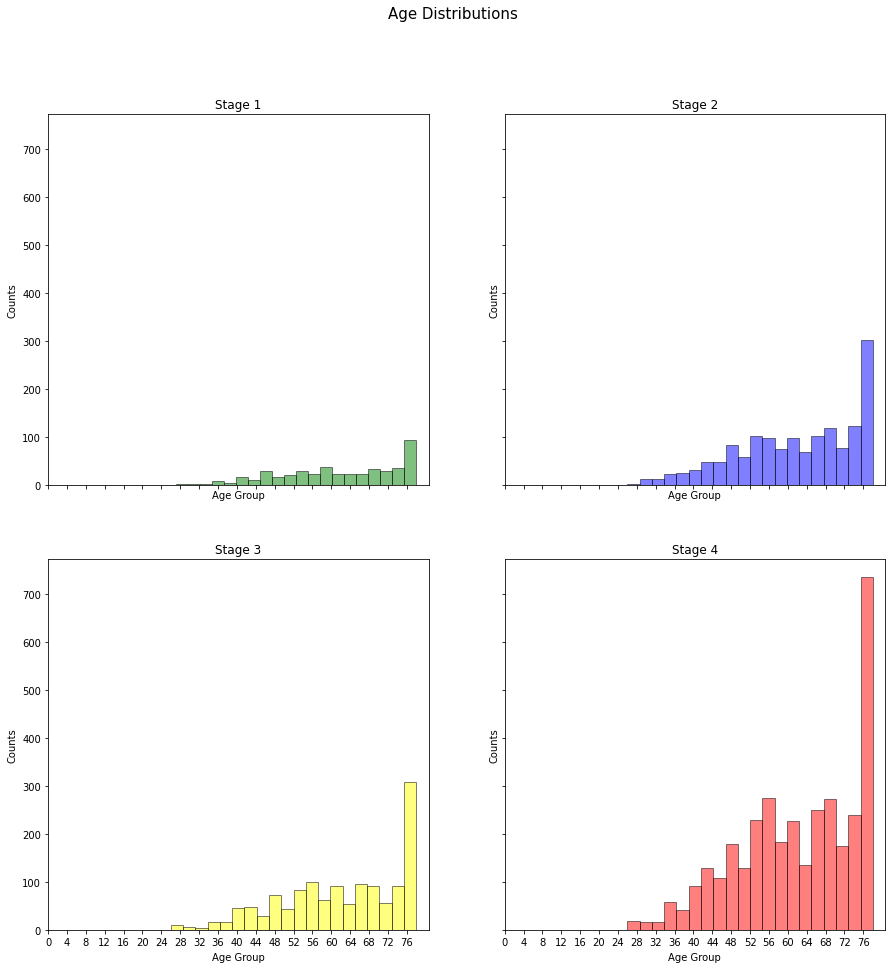

In [33]:
df_1["Age"] = (df_1["Age"]/365).astype(int)
df_2["Age"] = (df_2["Age"]/365).astype(int)
df_3["Age"] = (df_3["Age"]/365).astype(int)
df_4["Age"] = (df_4["Age"]/365).astype(int)

plt.figure(figsize=(20,10))
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True, figsize = (15, 15))
axes[0][0].hist(df_1["Age"], 20, facecolor='green', alpha=0.5, edgecolor='black')
axes[0][0].set_xticks(range(0,80,4))
axes[0][0].set_xlabel('Age Group', labelpad = 5)
axes[0][0].set_ylabel('Counts', labelpad = 5)
axes[0][0].set_title('Stage 1')

axes[0][1].hist(df_2["Age"], 20, facecolor='blue', alpha=0.5, edgecolor='black')
axes[0][1].set_xticks(range(0,80,4))
axes[0][1].set_xlabel('Age Group', labelpad = 5)
axes[0][1].set_ylabel('Counts', labelpad = 5)
axes[0][1].set_title('Stage 2')

axes[1][0].hist(df_3["Age"], 20, facecolor='yellow', alpha=0.5, edgecolor='black')
axes[1][0].set_xticks(range(0,80,4))
axes[1][0].set_xlabel('Age Group', labelpad = 5)
axes[1][0].set_ylabel('Counts', labelpad = 5)
axes[1][0].set_title('Stage 3')

axes[1][1].hist(df_4["Age"], 20, facecolor='red', alpha=0.5, edgecolor='black')
axes[1][1].set_xticks(range(0,80,4))
axes[1][1].set_xlabel('Age Group', labelpad = 5)
axes[1][1].set_ylabel('Counts', labelpad = 5)
axes[1][1].set_title('Stage 4')

f.suptitle("Age Distributions", fontsize=15)

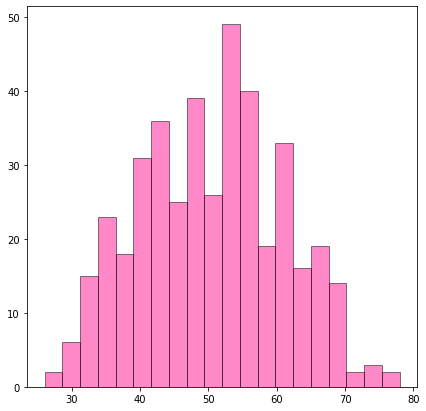

In [34]:
df_val["Age"] = (df_val["Age"]/365).astype(int)
plt.figure(figsize=(7,7))
plt.hist(df_val["Age"], 20, facecolor='deeppink', alpha=0.5, edgecolor='black')
plt.show()

**Spider**\
Spider is an abnormal collection of blood vessels near the surface of the skin. Spiders were seen more commonly in patients with alcoholic cirrhosis than in those with non-alcoholic cirrhosis. So one might get cirrhosis regardless of whether they have Spiders. \
Therefore this data is not going to help predict target (y).

In [35]:
df.groupby(["Stage", "Spiders"])["ID"].count()

Stage  Spiders
1.0    N           199
       Y            88
2.0    N           623
       Y           303
3.0    N           583
       Y           240
4.0    N          1505
       Y           669
Name: ID, dtype: int64

In [36]:
df_val.groupby(["Spiders"])["ID"].count()

Spiders
N    222
Y     90
Name: ID, dtype: int64

**Hepatomegaly**\
Hepatomegaly is a condition where one has an enlarged liver. Hepatomegaly is considered as one of the potential complications of Liver Cirrhosis but not a definite indicator.

In [37]:
df.groupby(["Stage", "Hepatomegaly"])["ID"].count()

Stage  Hepatomegaly
1.0    N                188
       Y                134
2.0    N                560
       Y                408
3.0    N                503
       Y                355
4.0    N               1303
       Y                922
Name: ID, dtype: int64

In [38]:
df_val.groupby(["Hepatomegaly"])["ID"].count()

Hepatomegaly
N    152
Y    160
Name: ID, dtype: int64

**Ascites**\
Ascites is abdominal swelling caused due to accumulation of fluid in the abdomen. Mostly it is related to liver cirrhosis/liver cancer/kidney damage. Cirrhosis of the liver is the most common cause of ascites. But the given data points to the contrary. \
Therefore the data is not suitable for predicting target (y).

In [39]:
df.groupby(["Stage", "Ascites"])["ID"].count()

Stage  Ascites
1.0    N           257
       Y            41
2.0    N           866
       Y           126
3.0    N           759
       Y           131
4.0    N          2091
       Y           283
Name: ID, dtype: int64

In [40]:
df_val.groupby(["Ascites"])["ID"].count()

Ascites
N    288
Y     24
Name: ID, dtype: int64

# SCALING OPERATION
Using RobustScaler for removing the outliers and then using MinMaxScaler for preprocessing the dataset.

In [41]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


def ScaleAll(df_imputed):
    cols = ['N_Days', 'Age', 'Ascites', 'Hepatomegaly', 'Spiders', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets']
    temp = df_imputed[cols]
    df_scaled = df_imputed.copy()


    #Scaling selected columns
    scale = RobustScaler(with_centering=False, with_scaling=True)
    df_temp1 = pd.DataFrame(scale.fit_transform(temp))
    del scale
    scale = MinMaxScaler()
    df_temp2 = pd.DataFrame(scale.fit_transform(df_temp1))
    del scale

    df_temp2.columns = temp.columns
    df_scaled[cols] = df_temp2[cols]

    return df_scaled

df_scaled = ScaleAll(df_imputed)
df_scaled_val = ScaleAll(df_imputed_val)

In [42]:
df_scaled.to_csv('proc_data.csv')   #Simply saving the data

# FEATURE SELECTION AND ENGINEERING
As it has been presented in the Feature Exploration section, many (pairs of) features tend to have strong correlation to the target and some features were target leakages.\
In this section, features are filtered and refined features are engineered using Dimensionality Reduction method.

Removing the most obvious target leakages:

In [43]:
X = df_scaled.drop(["ID", "Status", "Prothrombin","Spiders", "Ascites", "Edema"], axis=1)
y = X.pop("Stage")
y = y - 1
y.astype(int)

0       3
1       0
2       2
3       3
4       1
       ..
6795    0
6796    3
6797    0
6798    1
6799    3
Name: Stage, Length: 6800, dtype: int64

In [44]:
X_val = df_scaled_val.drop(["ID", "Status", "Prothrombin", "Spiders", "Ascites", "Edema"], axis=1)
y_val = X_val.pop("Stage")
y_val = y_val - 1
y_val.astype(int)

0      3
1      2
2      3
3      3
4      2
      ..
413    2
414    3
415    2
416    2
417    3
Name: Stage, Length: 418, dtype: int64

Decrementing the target class by 1.\
XGBClassifier expects target classes to be in the range of `(0, number of class]`.

In [45]:
from sklearn.decomposition import IncrementalPCA

def Dimen_Reduce(X, y, n, X_val):
    
    pca = IncrementalPCA(n_components = n, batch_size=200)
    X_pca = pca.fit_transform(X, y)
    V_pca = pca.transform(X_val)
    del pca
    return X_pca, V_pca


Performing Dimensionality Reduction using Incremental Principal Component Analysis\
Depending on the size of the input data, this algorithm can be much more memory efficient than a PCA.\
\
This algorithm has constant memory complexity, on the order of `batch_size * n_features`, enabling use of `np.memmap files` without loading the entire file into memory.\
(For more information, please check [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html))

Based on insights gained from Feature Exploration, new features are engineered using few selected features which might show stronger correlation to the target.

In [46]:
new_comp1 = X[["Bilirubin", "Alk_Phos"]]
new_comp2 = X[["Bilirubin", "SGOT"]]
new_comp3 = X[["Drug", "NaN_Drug", "Copper"]]
new_comp4 = X[["Tryglicerides", "Bilirubin", "Alk_Phos"]]

new_comp1_val = X_val[["Bilirubin", "Alk_Phos"]]
new_comp2_val = X_val[["Bilirubin", "SGOT"]]
new_comp3_val = X_val[["Drug", "NaN_Drug", "Copper"]]
new_comp4_val = X_val[["Tryglicerides", "Bilirubin", "Alk_Phos"]]

new_comps1, new_comps1_val = Dimen_Reduce(new_comp1, y, 2, new_comp1_val)
new_comps2, new_comps2_val = Dimen_Reduce(new_comp2, y, 2, new_comp2_val)
new_comps3, new_comps3_val = Dimen_Reduce(new_comp3, y, 2, new_comp3_val)
new_comps4, new_comps4_val = Dimen_Reduce(new_comp4, y, 3, new_comp4_val)


X[["new_comp1", "new_comp2"]] = new_comps1
X[["new_comp3", "new_comp4"]] = new_comps2
X[["new_comp5", "new_comp6"]] = new_comps3
X[["new_comp7", "new_comp8", "new_comp9"]] = new_comps4

X_val[["new_comp1", "new_comp2"]] = new_comps1_val
X_val[["new_comp3", "new_comp4"]] = new_comps2_val
X_val[["new_comp5", "new_comp6"]] = new_comps3_val
X_val[["new_comp7", "new_comp8", "new_comp9"]] = new_comps4_val

X_val

,N_Days,Drug,Age,Hepatomegaly,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,...,Sex_M,new_comp1,new_comp2,new_comp3,new_comp4,new_comp5,new_comp6,new_comp7,new_comp8,new_comp9
0,0.075515,0.0,0.622822,1.0,14.5,0.085196,0.238806,0.260274,0.105279,0.258993,...,0.0,12.693838,-0.020360,12.693898,0.083598,-0.286704,-0.496084,12.693836,-0.022708,0.027554
1,0.937947,0.0,0.578364,1.0,1.1,0.109970,0.813433,0.085616,0.523509,0.202298,...,0.0,-0.705676,0.413160,-0.706130,0.033784,-0.286934,-0.496146,-0.705670,0.421648,-0.085616
2,0.204249,0.0,0.839597,0.0,1.4,0.033837,0.567164,0.352740,0.016724,0.161871,...,1.0,-0.406255,-0.093968,-0.406151,-0.006797,-0.286582,-0.496050,-0.406245,-0.078943,-0.185596
3,0.396298,0.0,0.545664,1.0,1.8,0.074924,0.216418,0.102740,0.429723,0.079554,...,0.0,-0.005784,0.318575,-0.006193,-0.089318,-0.286912,-0.496140,-0.005777,0.326798,-0.086316
4,0.307741,1.0,0.226748,1.0,3.4,0.096073,0.585821,0.238014,0.028143,0.201439,...,0.0,1.593757,-0.084830,1.593869,0.031744,-0.308830,0.503664,1.593765,-0.072325,-0.154748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.134623,0.6,0.780705,1.0,1.2,0.103565,0.373134,0.250685,0.153170,0.200794,...,0.0,-0.606099,0.042707,-0.606131,0.032229,0.699781,0.125863,-0.606098,0.043413,-0.006775
414,0.223391,0.0,0.243911,0.2,0.9,0.145740,0.697761,0.112671,0.083870,0.186238,...,0.0,-0.906178,-0.026251,-0.906138,0.017827,0.712856,-0.474040,-0.906173,-0.019505,-0.082676
415,0.213294,0.8,0.588967,0.4,1.6,0.151299,0.544776,0.190068,0.065835,0.185867,...,0.0,-0.206199,-0.045085,-0.206138,0.017097,0.695281,0.325792,-0.206193,-0.036820,-0.101829
416,0.136727,0.8,0.608178,0.4,0.8,0.203867,0.667910,0.277055,0.093668,0.286517,...,0.0,-1.006166,-0.016339,-1.006087,0.118157,0.695396,0.325823,-1.006162,-0.010005,-0.077278


Finding Mutual Information scores between features to see how strongly they are correlated to the target.

In [47]:
discrete_features = X.dtypes is not str

from sklearn.feature_selection import mutual_info_classif


def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state = 42)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_val, y_val.astype(int), discrete_features)
mi_scores = mi_scores.sort_values(ascending=False)
k = mi_scores.index.tolist()
refined_cols = k[:13]
print(refined_cols)
mi_scores[:15]

['new_comp9', 'new_comp8', 'new_comp7', 'new_comp1', 'new_comp2', 'new_comp4', 'new_comp3', 'N_Days', 'Alk_Phos', 'Age', 'Cholesterol', 'new_comp6', 'new_comp5']


new_comp9      1.220616
new_comp8      1.220616
new_comp7      1.220616
new_comp1      1.217300
new_comp2      1.217300
new_comp4      1.190768
new_comp3      1.190768
N_Days         1.174186
Alk_Phos       1.170869
Age            1.025938
Cholesterol    0.973002
new_comp6      0.951081
new_comp5      0.951081
Platelets      0.846852
SGOT           0.819581
Name: MI Scores, dtype: float64

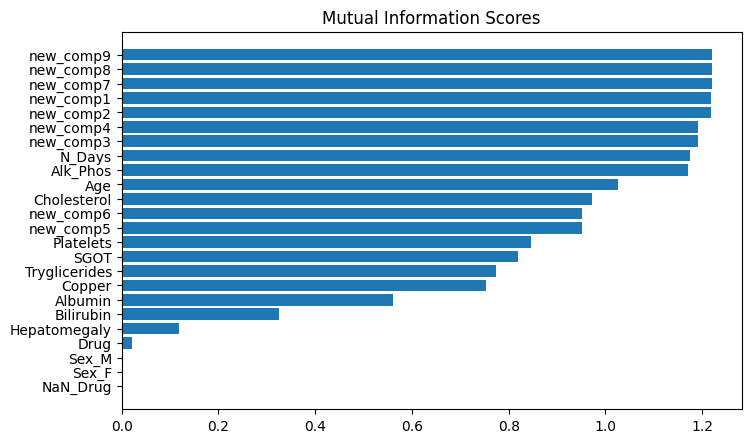

In [48]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Using 12 columns with top mutual information scores for training.

# MODELING

Splitting data for training and testing and checking overfitting and underfitting.\
Using `stratify` parameter to account for the imbalance in the data.

Tests on `XGBClassifier` with `OneVsRestClassifier`:

In [49]:
y.value_counts()

3.0    3506
1.0    1507
2.0    1322
0.0     465
Name: Stage, dtype: int64

In [50]:
from xgboost import XGBClassifier
def class_weight(labels_dict,mu=0.15):
    total = np.sum(labels_dict.values())
    keys = labels_dict.keys()
    weight = dict()
    for i in keys:
        score = np.log(mu*total/float(labels_dict[i]))
        weight[i] = score if score > 1 else 1
    return weight
# random labels_dict
#labels_dict = y.value_counts().to_dict()
#weights = class_weight(labels_dict)
weights = y.value_counts()/len(y)

model = obj = XGBClassifier(objective = "multi:softmax" , num_class = 4, n_jobs = -1, learning_rate= 0.17,
                    max_depth = 4, n_estimators = 180, tree_method = 'gpu_hist', subsample = 1,
                    random_state = 42, use_label_encoder=False, eval_metric = "logloss")
model.fit(X[refined_cols],y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.17, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=-1,
              num_class=4, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='gpu_hist',
              use_label_encoder=False, ...)

In [51]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier


val_results = model.predict(X_val[refined_cols])
train_results = model.predict(X[refined_cols])


from sklearn.metrics import f1_score

acc_train = f1_score(y,train_results, average = 'weighted')
acc_val = f1_score(y_val.astype(int),val_results, average = 'weighted')


print("Train score: {} ".format(acc_train))
print("Test score: {} ".format(acc_val))
val_results

Train score: 0.6475673527067612 
Test score: 0.2743924769775534 


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3,
       2, 3, 1, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3,
       3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3,
       2, 1, 1, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 2, 2, 3, 3, 3, 3,

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# confusion matrix
matrix = confusion_matrix(y, train_results, labels=[0, 1, 2, 3])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y, train_results,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y, train_results,labels=[0, 1, 2, 3])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[ 114   10    2  339]
 [   0  600    9  898]
 [   0   18  465  839]
 [   0   14    4 3488]]
Outcome values : 
 600 0 10 114
Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.25      0.39       465
           1       0.93      0.40      0.56      1507
           2       0.97      0.35      0.52      1322
           3       0.63      0.99      0.77      3506

    accuracy                           0.69      6800
   macro avg       0.88      0.50      0.56      6800
weighted avg       0.79      0.69      0.65      6800



In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# confusion matrix
matrix = confusion_matrix(y_val.astype(int), val_results, labels=[0, 1, 2, 3])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_val.astype(int), val_results,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_val.astype(int), val_results,labels=[0, 1, 2, 3])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[  0   0   2  19]
 [  0   7   6  81]
 [  0  12  22 125]
 [  1   9  16 118]]
Outcome values : 
 7 0 0 0
Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.25      0.07      0.11        94
           2       0.48      0.14      0.21       159
           3       0.34      0.82      0.48       144

    accuracy                           0.35       418
   macro avg       0.27      0.26      0.20       418
weighted avg       0.36      0.35      0.27       418



## Final Results: 
### Train score: 0.6475673527067612 
### Test score: 0.2743924769775534 

Usually in medical research, atmost 5-6% of missing values in the dataset is acceptable. \
Since the given dataset has 20.63% of the values missing, the testing scores are consequentially low.

**Acknowledgements:**
* https://medlineplus.gov/lab-tests/alkaline-phosphatase/
* https://www.webmd.com/heart-disease/heart-failure/edema-overview#:~:text=Medications%2C%20pregnancy%2C%20infections%2C%20and,almost%20anywhere%20in%20the%20body.
* https://www.webmd.com/digestive-disorders/tests-for-cirrhosis
* https://www.hepatitis.va.gov/hcv/patient/diagnosis/labtests-prothrombin-time.asp#:~:text=When%20the%20PT%20is%20high,serious%20liver%20damage%20or%20cirrhosis.
* https://amj.amegroups.com/article/view/4703/html
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3644745/#:~:text=found%20that%20the%20serum%20cholesterol,the%20progress%20of%20alcoholic%20cirrhosis.&text=Few%20studies%20on%20cirrhosis%20of,cholesterol%20values%20were%20significantly%20diminished.
* https://www.webmd.com/hepatitis/enlarged-liver-causes
* https://www.healthgrades.com/right-care/liver-conditions/enlarged-liver
* https://www.journal-of-hepatology.eu/article/S0168-8278(11)00682-9/fulltext
* https://gi.org/topics/ascites/
* https://www.healthline.com/health/sgot-test#followup
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3644745/#:~:text=Severe%20metabolic%20impairment%20in%20cirrhosis,density%20lipoprotein%20(LDL)%20cholesterol.
